# Описание 

Есть произвольное множество, вектор X [3,4,7,8,10,13]. Нужно найти апроксимирующую функцию. 

Задача сводится чтобы найти такую $y = kx+b$.


Критерий - минимизация квадрата ошибок: $ S(k,b) = \sum_{i=1}^n \big(y_i - (kx_i + b)\big)^2$

Решается через частные производные по $k$ и по $b$, приравниваем их к нулю и решаем систему

В итоге получается, что $$k = \frac{n \sum (x_i y_i) - \sum x_i \sum y_i}{n \sum (x_i^2) - (\sum x_i)^2} = \frac{\mathrm{Cov}(x,y)}{\mathrm{Var}(x)}=\; \frac{\sum_i (x_i-\bar x)(y_i-\bar y)}{\sum_i (x_i-\bar x)^2}$$

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [87]:
y = [320,258,365,405,396,428]
y = np.asarray(y, dtype=float)
x = np.asarray(range(0,len(y)), dtype=float)

In [88]:
# ---------  расчет k  ---------
x_c = x - x.mean()
y_c = y - y.mean()
den = (x_c**2).sum()
k = (x_c*y_c).sum()/den

# ---------  расчет b  ---------
b = y.mean() - k*x.mean()

print(f"коэф. к: {k}")
print(f"смещение. b: {b}")

коэф. к: 28.4
смещение. b: 291.0


----------------------------------------------------------------------------------

Найдем оценку стандартного отклонения $\sigma \;=\; \sqrt{\frac{\sum_{i=1}^n \big(y_i - \hat{y}_i\big)^2}{\,n - 2\,}}$

Найдем коэф. детерминации $R^2 \;=\; 1 - \frac{\sum_{i=1}^n \big(y_i - \hat{y}i\big)^2}{\sum{i=1}^n \big(y_i - \bar{y}\big)^2}$

In [89]:
# ---------  расчет сигмы  ---------
residuals = y - (k * x + b) # остатки (ошибки)
SSE = (residuals**2).sum() # Сумма квадратов ошибок
sigma = np.sqrt(SSE / (len(x) - 2))

# ---------  расчет коэф. детерминации R2  ---------
SST = ((y - y_c)**2).sum()
R2 = 1 - SSE / SST

print(f"сигма: {sigma}")
print(f"R2: {R2}")

сигма: 38.194240403495385
R2: 0.9925785741175992


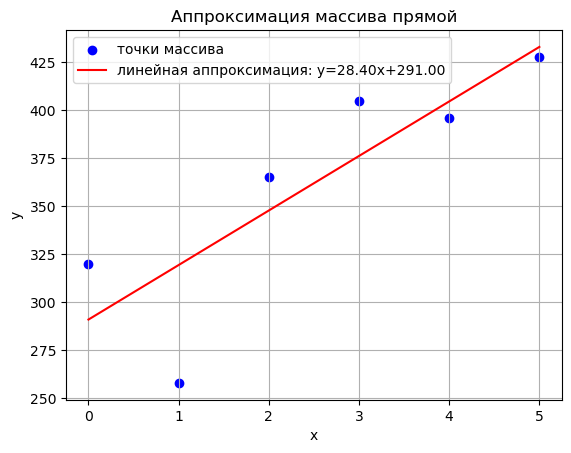

In [90]:
# --------- построение графика ---------
plt.scatter(x, y, color="blue", label="точки массива")
plt.plot(x, k*x + b, color="red", label=f"линейная аппроксимация: y={k:.2f}x+{b:.2f}")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Аппроксимация массива прямой")
plt.legend()
plt.grid(True)
plt.show()

# Применение в Feature Engineering

In [99]:

def fit_line(y: np.ndarray):
    """Посчитать k, b, sigma, R2 для массива y (x = индексы)."""
    n = len(y)
    x = np.arange(n, dtype=float)
    y = np.asarray(y, dtype=float)

    # наклон k
    x_c = x - x.mean()
    y_c = y - y.mean()
    k = (x_c * y_c).sum() / (x_c**2).sum()

    # смещение b
    b = y.mean() - k * x.mean()

    # предсказания и остатки
    y_hat = k * x + b
    residuals = y - y_hat

    # σ
    sse = (residuals**2).sum()
    sigma = np.sqrt(sse / (n - 2))

    # R^2
    sst = ((y - y.mean())**2).sum()
    R2 = 1 - sse / sst if sst > 0 else 1.0

    return k, b, sigma, R2

In [120]:
# пример датафрейма 10x10
np.random.seed(0)
df = pd.DataFrame(np.random.randint(1, 20, size=(10, 6)))
df.loc[10] = [320,258,365,405,396,428]


In [121]:
df[['k', 'b', 'sigma', 'R2']] = df.apply(
    lambda row: pd.Series(fit_line(row.values)), axis=1
)

In [122]:
df

,0,1,2,3,4,5,k,b,sigma,R2
0,13,16,1,4,4,8,-1.657143,11.809524,5.506273,0.283802
1,10,19,5,7,13,2,-1.600000,13.333333,5.927338,0.241727
2,7,8,15,18,6,14,0.914286,9.047619,5.213079,0.118610
3,9,10,17,6,16,16,1.200000,9.333333,4.475861,0.239241
4,1,19,4,18,15,8,1.057143,8.190476,8.174292,0.068183
5,1,2,10,1,11,4,0.942857,2.476190,4.671086,0.151285
6,12,19,3,1,1,5,-2.600000,13.333333,5.969366,0.453546
7,6,7,9,18,16,5,0.885714,7.952381,5.854587,0.091018
8,10,11,2,2,8,10,-0.257143,7.809524,4.573735,0.013640
9,4,7,12,15,19,1,0.685714,7.952381,7.534998,0.034966
